In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

## 空氣汙染分析

In [2]:
# 資料庫連線設定
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '123456',
    'database': 'airdb'
}

# 建立資料庫連線
conn = pymysql.connect(**db_config)

In [3]:
observatory  = input("===輸入測站名稱===")
# SQL = input("===輸入SQL語法===")

In [4]:
def query_by_observatory(observatory):
    try:
        with conn.cursor() as cursor:
            sql = "SELECT * FROM taiwan WHERE trim(測站) = %s"
            cursor.execute(sql,observatory)
            result = cursor.fetchall()
            
            if result:
                return pd.DataFrame(result)
            else:
                print("找不到資料")
    except pymysql.Error as e:
        print(f"查詢發生錯誤：{e}")

In [5]:
df = query_by_observatory(observatory)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,西屯,2022/01/01 00:00:00,AMB_TEMP,14.8,14.6,14.9,15.1,15.1,15.2,15.3,...,23.8,23.5,22,20.2,18.1,17.5,17.1,17,16.5,16.4
1,西屯,2022/01/01 00:00:00,CH4,2.13,2.11,2.07,2.06,2.08,2.07,2.06,...,2,2.02,2.02,2.04,2.03,2.03,2.05,2.06,2.06,2.05
2,西屯,2022/01/01 00:00:00,CO,0.3,0.46,0.27,0.22,0.26,0.23,0.22,...,0.22,0.23,0.25,0.3,0.22,0.22,0.24,0.27,0.26,0.25


In [6]:
data = pd.DataFrame()
data['date'] = pd.to_datetime(df[1])
data['year'] = pd.to_datetime(df[1]).dt.year
data['month'] = pd.to_datetime(df[1]).dt.month
data['day'] = pd.to_datetime(df[1]).dt.day
data['substance'] = df[2]
data['0hour'] = df[3]
data['1hour'] = df[4]
data['2hour'] = df[5]
data['3hour'] = df[6]
data['4hour'] = df[7]
data['5hour'] = df[8]
data['6hour'] = df[9]
data['7hour'] = df[10]
data['8hour'] = df[11]
data['9hour'] = df[12]
data['10hour'] = df[13]
data['11hour'] = df[14]
data['12hour'] = df[15]
data['13hour'] = df[16]
data['14hour'] = df[17]
data['15hour'] = df[18]
data['16hour'] = df[19]
data['17hour'] = df[20]
data['18hour'] = df[21]
data['19hour'] = df[22]
data['20hour'] = df[23]
data['21hour'] = df[24]
data['22hour'] = df[25]
data['23hour'] = df[26]



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6570 non-null   datetime64[ns]
 1   year       6570 non-null   int32         
 2   month      6570 non-null   int32         
 3   day        6570 non-null   int32         
 4   substance  6570 non-null   object        
 5   0hour      6570 non-null   object        
 6   1hour      6570 non-null   object        
 7   2hour      6570 non-null   object        
 8   3hour      6570 non-null   object        
 9   4hour      6570 non-null   object        
 10  5hour      6570 non-null   object        
 11  6hour      6570 non-null   object        
 12  7hour      6570 non-null   object        
 13  8hour      6570 non-null   object        
 14  9hour      6570 non-null   object        
 15  10hour     6570 non-null   object        
 16  11hour     6570 non-null   object        


In [8]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x) # 重要!!!! Delet 空格
data

,date,year,month,day,substance,0hour,1hour,2hour,3hour,4hour,...,14hour,15hour,16hour,17hour,18hour,19hour,20hour,21hour,22hour,23hour
0,2022-01-01,2022,1,1,AMB_TEMP,14.8,14.6,14.9,15.1,15.1,...,23.8,23.5,22,20.2,18.1,17.5,17.1,17,16.5,16.4
1,2022-01-01,2022,1,1,CH4,2.13,2.11,2.07,2.06,2.08,...,2,2.02,2.02,2.04,2.03,2.03,2.05,2.06,2.06,2.05
2,2022-01-01,2022,1,1,CO,0.3,0.46,0.27,0.22,0.26,...,0.22,0.23,0.25,0.3,0.22,0.22,0.24,0.27,0.26,0.25
3,2022-01-01,2022,1,1,NMHC,0.16,0.16,0.07,0.05,0.07,...,0.03,0.02,0.05,0.07,0.03,0.04,0.05,0.07,0.06,0.06
4,2022-01-01,2022,1,1,NO,0.5,3.3,1.8,1.4,1.4,...,1.9,2.3,2.3,2.2,1.9,1.4,1.5,1.5,1.6,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,2022-12-31,2022,12,31,THC,1.96,1.96,1.96,1.97,1.97,...,1.97,1.98,1.99,2.01,2.01,2.01,2,2.01,2,2.01
6566,2022-12-31,2022,12,31,WD_HR,14,10,12,11,15,...,348,353,5,357,3,0,13,12,14,18
6567,2022-12-31,2022,12,31,WIND_DIREC,12,11,14,14,14,...,345,357,6,359,2,356,10,18,14,20
6568,2022-12-31,2022,12,31,WIND_SPEED,4.4,4.2,3.5,3.4,2.9,...,3.9,4.9,3.8,3.1,2.1,2.9,2.4,2.3,0.3,0.3


In [9]:
# 每天平均
# 篩選符合條件的資料
filtered_data = data[data['substance'] == 'PM2.5']
hour_columns = [str(i) + 'hour' for i in range(24)]
filtered_data[hour_columns] = filtered_data[hour_columns].apply(lambda x: x.str.strip())
for column in hour_columns:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

filtered_data['daily_average'] = filtered_data[hour_columns].mean(axis=1)

print(filtered_data['daily_average'])



9       16.291667
27      13.041667
45      26.272727
63      19.750000
81      23.000000
          ...    
6489    12.291667
6507    12.000000
6525    12.217391
6543     6.375000
6561     7.666667
Name: daily_average, Length: 365, dtype: float64


C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2064\4186189628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[hour_columns] = filtered_data[hour_columns].apply(lambda x: x.str.strip())
C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2064\4186189628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2064\4186189628.py:9: SettingWithCopyWarning: 
A value is trying 

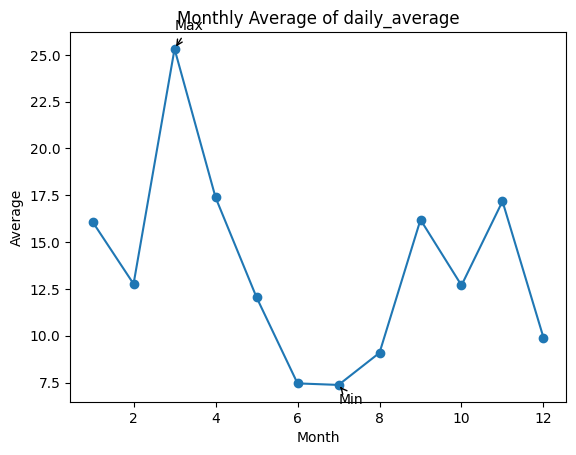

In [10]:
import matplotlib.pyplot as plt

# 按照月份分組並計算每個月的平均值
monthly_average = filtered_data.groupby('month')['daily_average'].mean()

# 找出最大和最小平均值的月份
max_month = monthly_average.idxmax()
min_month = monthly_average.idxmin()

# 創建圖表
plt.figure()

# 繪製月平均值的折線圖
monthly_average.plot(marker='o', linestyle='-')

# 標註最大和最小月份
plt.annotate('Max', xy=(max_month, monthly_average[max_month]),
             xytext=(max_month, monthly_average[max_month] + 1),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate('Min', xy=(min_month, monthly_average[min_month]),
             xytext=(min_month, monthly_average[min_month] - 1),
             arrowprops=dict(facecolor='green', arrowstyle='->'))

# 加入標籤和標題
plt.xlabel('Month')
plt.ylabel('Average')
plt.title('Monthly Average of daily_average')

# 顯示圖表
plt.show()


最大值 : 29.583333333333332, 最小值 : 3.4583333333333335, 平均值 : 12.69021739130435


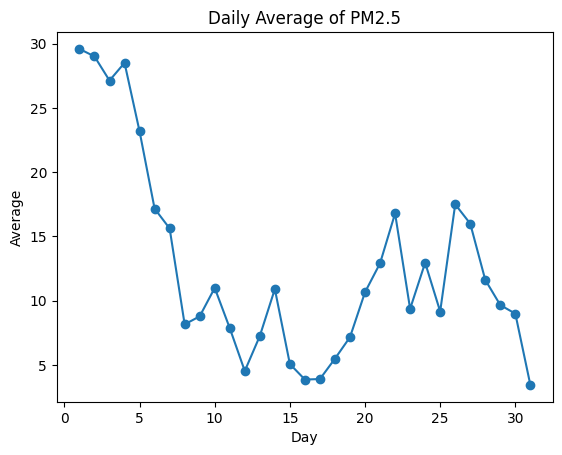

In [11]:
def daily_average_plot(month):
    nov = filtered_data[filtered_data['month'] == month]
    
    # 計算最大值、最小值和平均值
    max_value = nov['daily_average'].max()
    min_value = nov['daily_average'].min()
    mean_value = nov['daily_average'].mean()
    print(f'最大值 : {max_value}, 最小值 : {min_value}, 平均值 : {mean_value}')

    if month in [1, 3, 5, 7, 8, 10, 12]:
        x_values = range(1, 32)  # 代表一個月的日期
    else:
        if month == 2:
            x_values = range(1, 29)
        else:
            x_values = range(1, 31)


    # 創建圖表
    plt.figure()

    #nov['daily_average'].plot(marker='o', linestyle='-')

    plt.plot(x_values, nov['daily_average'], marker='o', linestyle='-')
    plt.xlabel('Day')
    plt.ylabel('Average')
    plt.title('Daily Average of PM2.5')
    plt.show()


    # 顯示圖表
    plt.show()

daily_average_plot(10)

C:\Users\Takodachi\AppData\Local\Temp\ipykernel_2064\2255929401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = pd.to_datetime(filtered_data['date']).dt.month


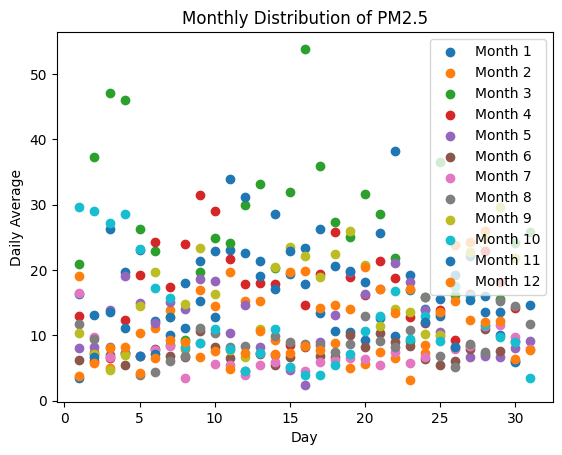

In [12]:
# 依照月份繪製filtered_data整體分布情況
filtered_data['month'] = pd.to_datetime(filtered_data['date']).dt.month
# 創建圖表
plt.figure()

# 根據月份繪製散點圖
for month in range(1, 13):
    month_data = filtered_data[filtered_data['month'] == month]
    plt.scatter(month_data['day'], month_data['daily_average'], label='Month {}'.format(month))

# 加入標籤和標題
plt.xlabel('Day')
plt.ylabel('Daily Average')
plt.title('Monthly Distribution of PM2.5')
plt.legend()

# 顯示圖表
plt.show()